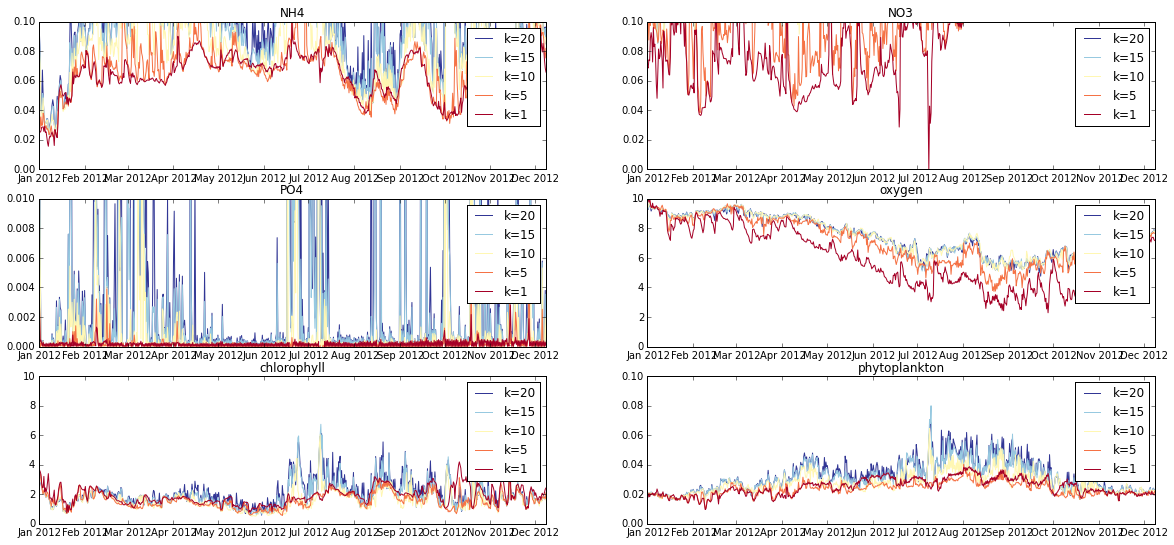

In [2]:
# (c) 2015 Teruhisa Okada

% matplotlib inline

import netCDF4
import matplotlib.pyplot as plt

import romspy


def plot(ax, vname, station, cff=1.0):
    time = nc.variables['ocean_time'][:]
    time = netCDF4.num2date(time, romspy.JST)
    var = nc.variables[vname][:,:,:] * cff
    ax.plot(time, var[:,station-1,19], 'b-', label='surface')
    ax.plot(time, var[:,station-1,0], 'r-', label='bottom')
    ax.legend()
    
def plot2(ax, vname, station, cff=1.0):
    time = nc.variables['ocean_time'][:]
    time = netCDF4.num2date(time, romspy.JST)
    var = nc.variables[vname][:,station-1,:] * cff
    for k in [19, 14, 9, 4, 0]:
        d = k
        ax.plot(time, var[:,k], '-', color=plt.cm.RdYlBu(k/19.0), label='k={}'.format(k+1))
    ax.legend()
    ax.set_title(vname)
    
def sta_plot(station):
    x, y = 3, 2
    fig, ax = plt.subplots(x, y, figsize=[20,9])
    ax1 = [ax[i][j] for i in range(x) for j in range(y)]
    plot2(ax1[0], 'NH4', station, cff=14.0/1000)
    plot2(ax1[1], 'NO3', station, cff=14.0/1000)
    plot2(ax1[2], 'PO4', station, cff=31.0/1000)
    plot2(ax1[3], 'oxygen', station, cff=32.0/1000)
    plot2(ax1[4], 'chlorophyll', station, cff=1.0)
    plot2(ax1[5], 'phytoplankton', station, cff=14.0/1000)
    ax1[0].set_ylim(0.0,0.1)
    ax1[1].set_ylim(0.0,0.1)
    ax1[2].set_ylim(0.0,0.01)
    ax1[3].set_ylim(0.0,10.0)
    ax1[4].set_ylim(0.0,10.0)
    ax1[5].set_ylim(0.0,0.1)

    
ncfile = 'Z:/apps/OB500P/case13/ob500_sta.nc'
nc = netCDF4.Dataset(ncfile, 'r')

sta_plot(12)

#plt.savefig('time_sta.png', bbox_inches='tight', dpi=300)

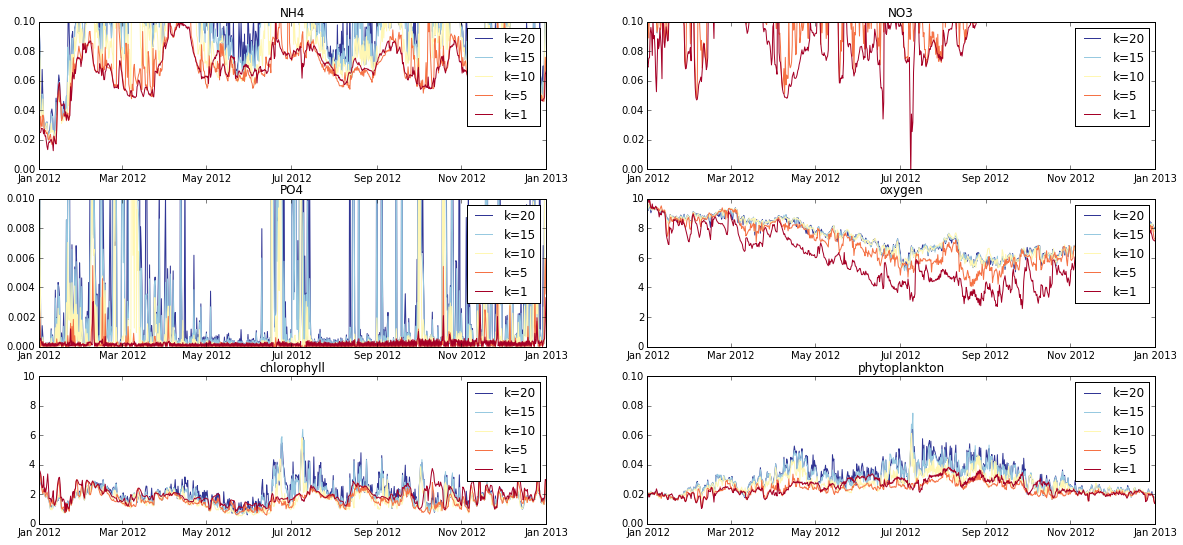

In [1]:
ncfile = 'Z:/roms/Apps/OB500_fennelP/NL12/ob500_sta.nc'
nc = netCDF4.Dataset(ncfile, 'r')

sta_plot(12)

#plt.savefig('time_sta.png', bbox_inches='tight', dpi=300)